### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
url = 'https://drive.google.com/file/d/1zpWMM5dLIJ03JlytRfqCsIHkW0P_G4Pn/view'
df_cpu = pd.read_csv('https://drive.google.com/uc?id=' + url.split('/')[-2])
df_cpu.head()

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
0,2021-9301,Ryzen 5,4GB,SSD,500GB,NO,Office
1,2021-9302,Ryzen 5,16GB,SSD,500GB,6GB,GAMING
2,2021-9303,Ryzen 3,4GB,HDD,1TB,NO,Office
3,2021-9304,Ryzen 5,16GB,SSD,1TB,4GB,GAMING
4,2021-9305,Pentium,16GB,HDD,500GB,6GB,Office


Before proceeding, the column names are checked so that it will be easier to access when exploring the data and creating the deep learning model.

In [3]:
print(df_cpu.columns.tolist())

['ITEM NO.', 'CPU', 'RAM', 'Type of Storage', 'Storage Capacity', 'GPU ', 'Target Usage']


Since there is an unnecessary whitespace in the `GPU` column name, we will remove the whitespace and rename the column.

In [4]:
df_cpu.rename(columns={'GPU ': 'GPU'}, inplace=True)

We will also remove the leading and trailing whitespaces in the column values.

In [5]:
# Stripping the whitespaces in the columns

df_cpu['CPU'] = df_cpu['CPU'].str.strip()
df_cpu['RAM'] = df_cpu['RAM'].str.strip()
df_cpu['Type of Storage'] = df_cpu['Type of Storage'].str.strip()
df_cpu['Storage Capacity'] = df_cpu['Storage Capacity'].str.strip()
df_cpu['GPU'] = df_cpu['GPU'].str.strip()

### Handling Null Values
Next, we will check if there are any null values in the dataset. This is done to verify the quality of the data before the Exploratory Data Analysis and the creation of the Deep Learning Model.

In [6]:
df_cpu[df_cpu.isnull().any(axis=1)] # Displays records that have missing values in any column

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
5,2021-9306,i7,4GB,SSD,NaN,NO,Office
26,2021-9327,Pentium,NaN,HDD,500GB,4GB,Office
30,2021-9331,Ryzen 5,4GB,HDD,1TB,NaN,Office
44,2021-9345,i7,8GB,NaN,500GB,6GB,GAMING


We can also check the shape of the DataFrame and compare it with the number of rows with null values.

In [7]:
df_cpu.shape # Displays the number of rows and columns in the dataframe

(50, 7)

### Cleaning the Null Values

The dataset has a total of 50 rows and 7 columns. There are only 4 instances of null values and these appeared randomly in the dataset. Since the number of missing values are relatively small, we can simply drop the rows with null values

In [8]:
df_cpu.dropna(inplace=True)
df_cpu.isnull().sum()

ITEM NO.            0
CPU                 0
RAM                 0
Type of Storage     0
Storage Capacity    0
GPU                 0
Target Usage        0
dtype: int64

### Descriptive Statistics

In [9]:
df_cpu.count()

ITEM NO.            46
CPU                 46
RAM                 46
Type of Storage     46
Storage Capacity    46
GPU                 46
Target Usage        46
dtype: int64

In [10]:
df_cpu.describe()

,ITEM NO.,CPU,RAM,Type of Storage,Storage Capacity,GPU,Target Usage
count,46,46,46,46,46,46,46
unique,46,7,3,2,2,3,2
top,2021-9301,Pentium,4GB,SSD,500GB,NO,Office
freq,1,10,17,29,23,17,24


### Exploratory Data Analysis

We will explore the most used `CPU`, `RAM`, `Type of Storage`, `Storage Capacity`, and `GPU` for the two `Target Usage`. We can use these data later when testing our Deep Learning Model.

i9         7
Ryzen 5    4
Ryzen 7    4
Ryzen 3    3
i5         2
i7         2
Name: CPU, dtype: int64

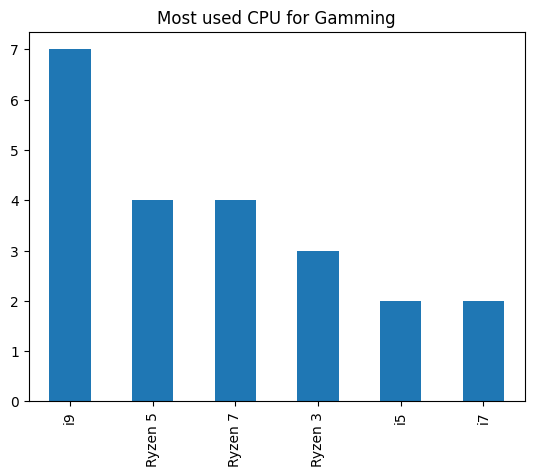

In [11]:
# Most used CPU for Gaming
df_cpu["CPU"][df_cpu["Target Usage"] == "GAMING"].value_counts().plot(kind='bar', title='Most used CPU for Gamming')
df_cpu["CPU"][df_cpu["Target Usage"] == "GAMING"].value_counts()

16GB    14
8GB      8
Name: RAM, dtype: int64

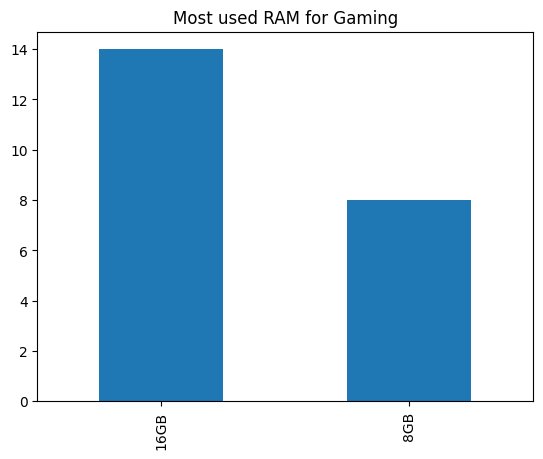

In [12]:
# Most used RAM for Gaming
df_cpu["RAM"][df_cpu["Target Usage"] == "GAMING"].value_counts().plot(kind='bar', title='Most used RAM for Gaming')
df_cpu["RAM"][df_cpu["Target Usage"] == "GAMING"].value_counts()

SSD    20
HDD     2
Name: Type of Storage, dtype: int64

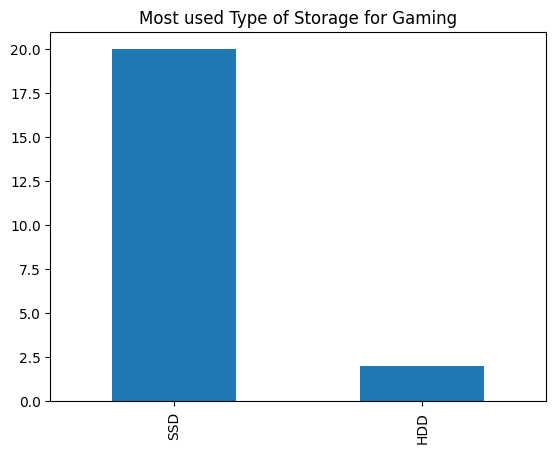

In [13]:
# Most used Type of Storage for Gaming
df_cpu["Type of Storage"][df_cpu["Target Usage"] == "GAMING"].value_counts().plot(kind='bar', title='Most used Type of Storage for Gaming')
df_cpu["Type of Storage"][df_cpu["Target Usage"] == "GAMING"].value_counts()

1TB      12
500GB    10
Name: Storage Capacity, dtype: int64

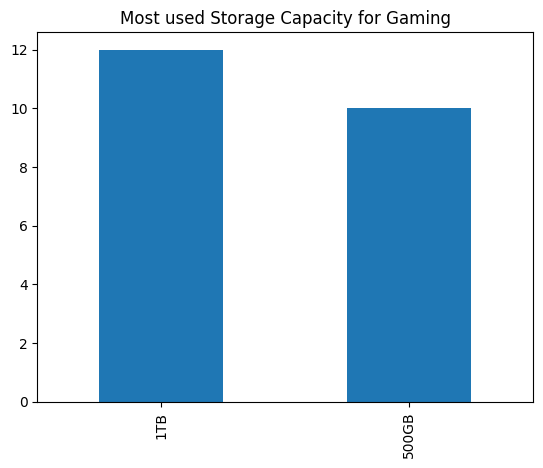

In [14]:
# Most used Storage Capacity for Gaming
df_cpu["Storage Capacity"][df_cpu["Target Usage"] == "GAMING"].value_counts().plot(kind='bar', title='Most used Storage Capacity for Gaming')
df_cpu["Storage Capacity"][df_cpu["Target Usage"] == "GAMING"].value_counts()

6GB    12
4GB    10
Name: GPU, dtype: int64

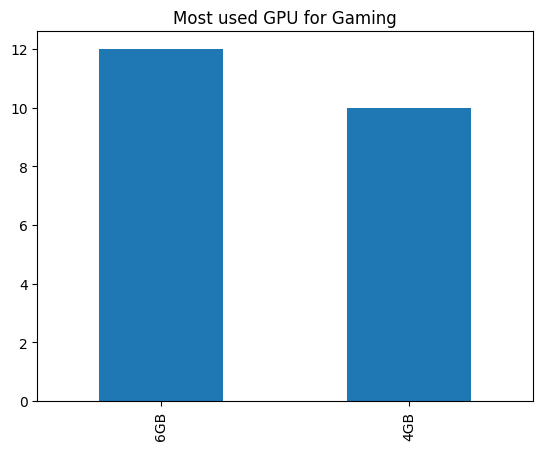

In [15]:
# Most used GPU for Gaming
df_cpu["GPU"][df_cpu["Target Usage"] == "GAMING"].value_counts().plot(kind='bar', title='Most used GPU for Gaming')
df_cpu["GPU"][df_cpu["Target Usage"] == "GAMING"].value_counts()

Pentium    10
Ryzen 5     4
Ryzen 3     2
i7          2
Ryzen 7     2
i9          2
i5          2
Name: CPU, dtype: int64

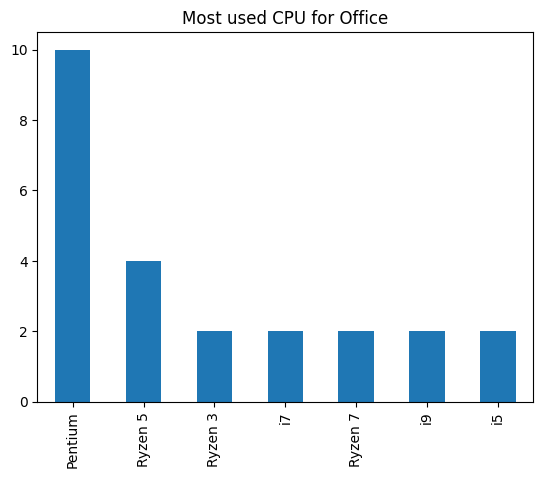

In [16]:
# Most used CPU for Office
df_cpu["CPU"][df_cpu["Target Usage"] == "Office"].value_counts().plot(kind='bar', title='Most used CPU for Office')
df_cpu["CPU"][df_cpu["Target Usage"] == "Office"].value_counts()

4GB     17
8GB      4
16GB     3
Name: RAM, dtype: int64

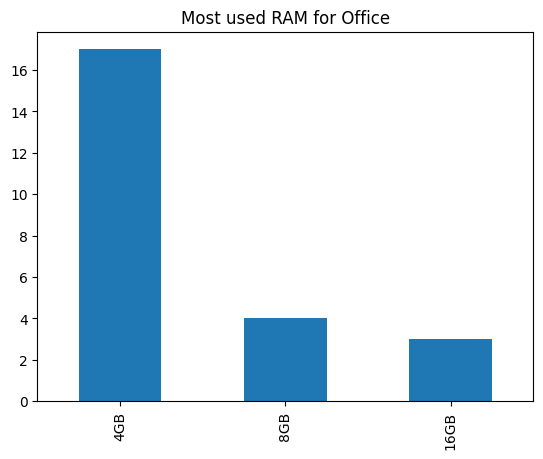

In [17]:
# Most used RAM for Office
df_cpu["RAM"][df_cpu["Target Usage"] == "Office"].value_counts().plot(kind='bar', title='Most used RAM for Office')
df_cpu["RAM"][df_cpu["Target Usage"] == "Office"].value_counts()

HDD    15
SSD     9
Name: Type of Storage, dtype: int64

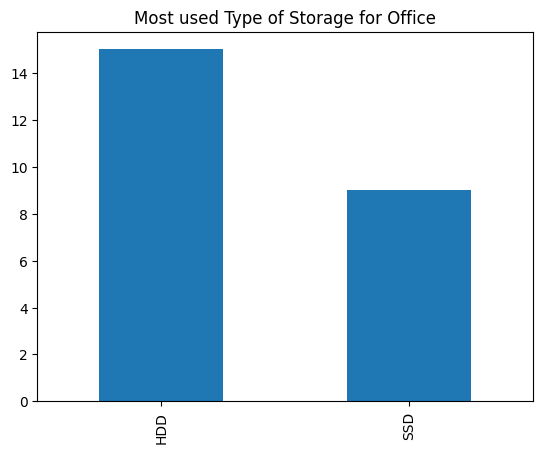

In [18]:
# Most used Type of Storage for Office
df_cpu["Type of Storage"][df_cpu["Target Usage"] == "Office"].value_counts().plot(kind='bar', title='Most used Type of Storage for Office')
df_cpu["Type of Storage"][df_cpu["Target Usage"] == "Office"].value_counts()

500GB    13
1TB      11
Name: Storage Capacity, dtype: int64

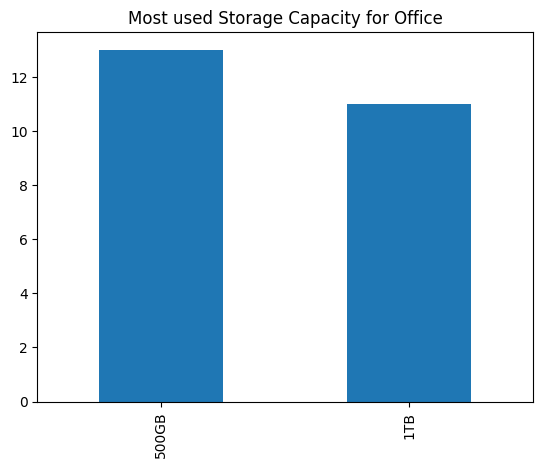

In [19]:
# Most used Storage Capacity for Office
df_cpu["Storage Capacity"][df_cpu["Target Usage"] == "Office"].value_counts().plot(kind='bar', title='Most used Storage Capacity for Office')
df_cpu["Storage Capacity"][df_cpu["Target Usage"] == "Office"].value_counts()

NO     17
6GB     4
4GB     3
Name: GPU, dtype: int64

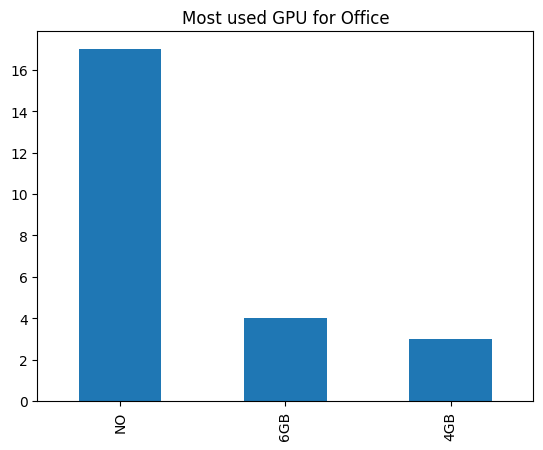

In [20]:
# Most used GPU for Office
df_cpu["GPU"][df_cpu["Target Usage"] == "Office"].value_counts().plot(kind='bar', title='Most used GPU for Office')
df_cpu["GPU"][df_cpu["Target Usage"] == "Office"].value_counts()

### Substituting String Values with Integers
This is done since the deep learning model only accepts numerical inputs.

In [21]:
# Substituting the string values with numeric values

df_cpu["CPU"].replace({"Pentium": 0, "i5": 1, "i7": 2, "i9": 3, "Ryzen 3": 4, "Ryzen 5": 5, "Ryzen 7": 6}, inplace=True)
df_cpu["RAM"].replace({"4GB": 0, "8GB": 1, "16GB": 2}, inplace=True)
df_cpu["Type of Storage"].replace({"SSD": 0, "HDD": 1}, inplace=True)
df_cpu["Storage Capacity"].replace({"1TB": 0, "500GB": 1}, inplace=True)
df_cpu["GPU"].replace({"NO": 0, "4GB": 1, "6GB": 2}, inplace=True)
df_cpu["Target Usage"].replace({"Office": 0, "GAMING": 1}, inplace=True)

### Creating the Deep Learning Model
#### Splitting the Data
Before creating the deep learning model, we need to first define the the independent (X) and the dependent (Y) variables. The independent variables will be the `CPU`, `RAM`, `Type of Storage`, `Storage Capacity`, and `GPU` while the dependent variable will be the `Target Usage`.

In [22]:
X = df_cpu.drop(['ITEM NO.','Target Usage'], axis=1)
Y = df_cpu['Target Usage']

After defining the independent and dependent variables, we will split the dataset into the training and testing sets by importing the `train_test_split` from `sklearn.model_selection`. The X_train  and Y_train would be used to train the model and the X_test would be used as input to evaluate the model. When splitting the testing and training sets 80:20 ratio would be used as it is commonly utilized.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10, shuffle=True)

In [25]:
# Displaying the shapes of the training sets
X_train.shape, Y_train.shape

((36, 5), (36,))

In [26]:
# Displaying the shapes of the training sets
X_test.shape, Y_test.shape

((10, 5), (10,))

#### Defining the Model
Since the goal of the deep learning model is to classify whether the computer specifications are suitable for either office or gaming use, we will create a Neural Network for Binary Classification.

First, we will import the TensorFlow and Keras libraries.

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

For the model, we will define three hidden layers where the first layer has 25 nodes, the second layer has 20 nodes, and the third layer has 20 nodes. The activation function which will be used for the three hidden layers is `ReLU`. The `Rectified Linear Unit` or `ReLU` is used as it accelerates the convergence of the model.

We will also define an output layer with one node that uses the `Sigmoid` function as its activation function. The `Sigmoid` function is used as it converts the input into a value that is within the range of 0 to 1. This activation function is usually used for to predict the probability of a binary variable.

In [28]:
model = keras.Sequential()

# Adding the first hidden layer
model.add(layers.Dense(25, activation='relu', input_shape=(5,)))
# Adding the second hidden layer
model.add(layers.Dense(20, activation='relu'))
# Adding the third hidden layer
model.add(layers.Dense(20, activation='relu'))
# Adding the output layer
model.add(layers.Dense(1, activation='sigmoid'))

#### Compile and Fit
After defining the nodes and layers, we will compile the model using the `Adam` optimizer, the `binary_crossentropy` loss function, and the `accuracy` class for metrics. The `Adam` optimizer is usually used as it is computationally efficient and requires minimal memory while the `binary_crossentropy` loss function is used since we are building a binary classification model.

Next, we will fit the model with the training set with a validation split of 0.50, and epochs of 50.

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
NN = model.fit(X_train, Y_train, validation_split=0.50, epochs=50)

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.7044 - accuracy: 0.3889 - val_loss: 0.6086 - val_accuracy: 0.4444
Epoch 2/50
1/1 [==============================] - 0s 42ms/step - loss: 0.6826 - accuracy: 0.3889 - val_loss: 0.6025 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 63ms/step - loss: 0.6624 - accuracy: 0.4444 - val_loss: 0.5974 - val_accuracy: 0.6667
Epoch 4/50
1/1 [==============================] - 0s 52ms/step - loss: 0.6434 - accuracy: 0.7778 - val_loss: 0.5942 - val_accuracy: 0.6667
Epoch 5/50
1/1 [==============================] - 0s 58ms/step - loss: 0.6256 - accuracy: 0.8333 - val_loss: 0.5921 - val_accuracy: 0.6111
Epoch 6/50
1/1 [==============================] - 0s 63ms/step - loss: 0.6097 - accuracy: 0.8333 - val_loss: 0.5920 - val_accuracy: 0.6667
Epoch 7/50
1/1 [==============================] - 0s 53ms/step - loss: 0.5973 - accuracy: 0.8333 - val_loss: 0.5922 - val_accuracy: 0.6667
Epoch 8/50
1/1 [=============

### Evaluating the Model

We will evaluate the model using the training and testing sets.

In [30]:
# Model evaluation with the training set
model.evaluate(X_train, Y_train)

2/2 [==============================] - 0s 12ms/step - loss: 0.3435 - accuracy: 0.9722


[0.3434736430644989, 0.9722222089767456]

In [31]:
# Model evaluation with the testing set
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 33ms/step - loss: 0.3911 - accuracy: 0.9000


[0.39108169078826904, 0.8999999761581421]

### Confusion Matrix
Here, we will be able to see the correct and incorrect classification with the testing dataset

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
Y_pred = (model.predict(X_test) > 0.5).astype("int32")
confusion_matrix(Y_test, Y_pred)

1/1 [==============================] - 0s 169ms/step


array([[2, 1],
       [0, 7]], dtype=int64)

### Plotting the Training

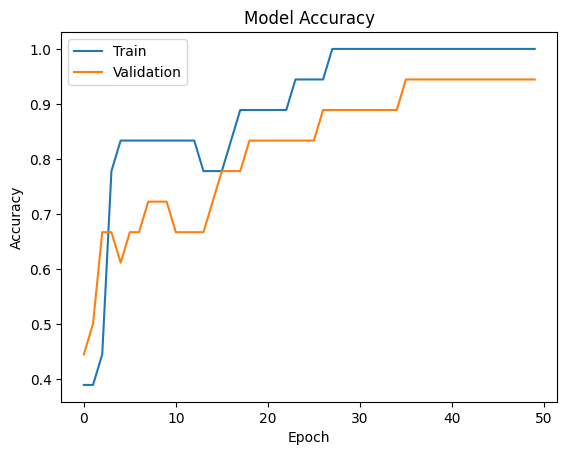

In [34]:
plt.plot(NN.history['accuracy'])
plt.plot(NN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

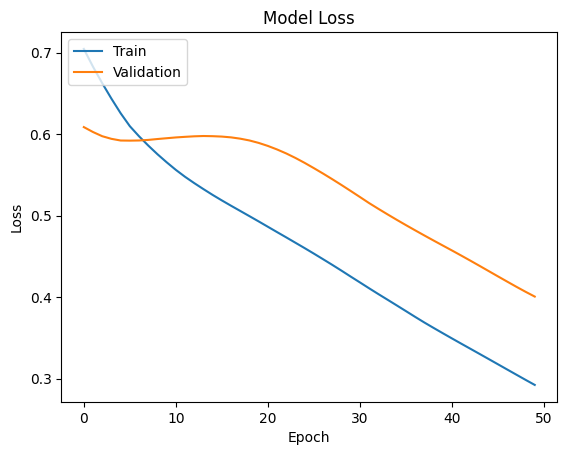

In [35]:
plt.plot(NN.history['loss'])
plt.plot(NN.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Based on the graphs, the training of the model showed that the model's accuracy improved and the loss was reduced.

#### Making Predictions
Using our findings in our exploratory data analysis, we will test if our model will be able to correctly predict the target usage of a given computer specifications.

In [36]:
# Creating a function to classify the usage of the computer specifications
def classify_usage(prediction):
    if prediction == 0:
        print("The CPU is suited to use for OFFICE")
    else:
        print("The CPU is suited to use for GAMING")

In [40]:
# Testing the model with the most used CPU, RAM, Storage Type, Storage Capacity, and GPU for OFFICE use
features = np.array([[0, 0, 1, 1, 0]]) 

prediction = (model.predict(features) > 0.5).astype("int32")
classify_usage(prediction)
    

1/1 [==============================] - 0s 49ms/step
The CPU is suited to use for OFFICE


In [39]:
# Testing the model with the most used CPU, RAM, Storage Type, Storage Capacity, and GPU for GAMING use
features = np.array([[3, 2, 0, 0, 2]])

prediction = (model.predict(features) > 0.5).astype("int32")
classify_usage(prediction)
    

1/1 [==============================] - 0s 39ms/step
The CPU is suited to use for GAMING
